### *Libraries*

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import plotly.graph_objects as go
import statsmodels.api as smi
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
#pandas option to display max columns
pd.set_option('display.max_columns',None)
# Set Matplotlib defaults Style
plt.style.use('ggplot')
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10
    )
sns.set_palette('plasma', n_colors=None, desat=None, color_codes=False)
import warnings
warnings.simplefilter("ignore")

## **ETL** ( Extract, Transform, Load)

In [2]:
df=pd.read_csv('Cost_of_Living_Index_by_Country_2024.csv')
df.head(15)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5
5,6,Norway,76.0,26.2,52.1,79.0,73.5,114.7
6,7,Denmark,72.3,26.4,50.2,64.8,81.3,127.2
7,8,Hong Kong (China),70.8,59.4,65.3,84.6,46.2,109.3
8,9,United States,70.4,41.7,56.6,75.0,67.2,142.3
9,10,Australia,70.2,33.4,52.5,77.3,62.5,127.4


In [3]:
#datas types 
df.dtypes

Rank                                int64
Country                            object
Cost of Living Index              float64
Rent Index                        float64
Cost of Living Plus Rent Index    float64
Groceries Index                   float64
Restaurant Price Index            float64
Local Purchasing Power Index      float64
dtype: object

In [4]:
#missing values 
df.isnull().sum()

Rank                              0
Country                           0
Cost of Living Index              0
Rent Index                        0
Cost of Living Plus Rent Index    0
Groceries Index                   0
Restaurant Price Index            0
Local Purchasing Power Index      0
dtype: int64

In [5]:
# duplicated data
df.duplicated().sum()

0

**we see that the dataset is clean ( no null values and no duplicated )so we can start working with it**

## **EDA (Exploratory Data Analysis)**

In [6]:
# Generate summary statistics for the numerical columns
df.describe()


# Comments:
# - The count shows the number of non-null entries for each column.
# - The mean provides the average value for each index.
# - The std (standard deviation) indicates the dispersion of the data around the mean.
# - The min and max values help in identifying the range of data, which might highlight potential outliers.
# - The 25%, 50%, and 75% values represent the first, second (median), and third quartiles, respectively, offering insight into the data distribution.


,Rank,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,61.000000,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,35.073732,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,1.000000,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,31.000000,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,61.000000,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,91.000000,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,121.000000,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


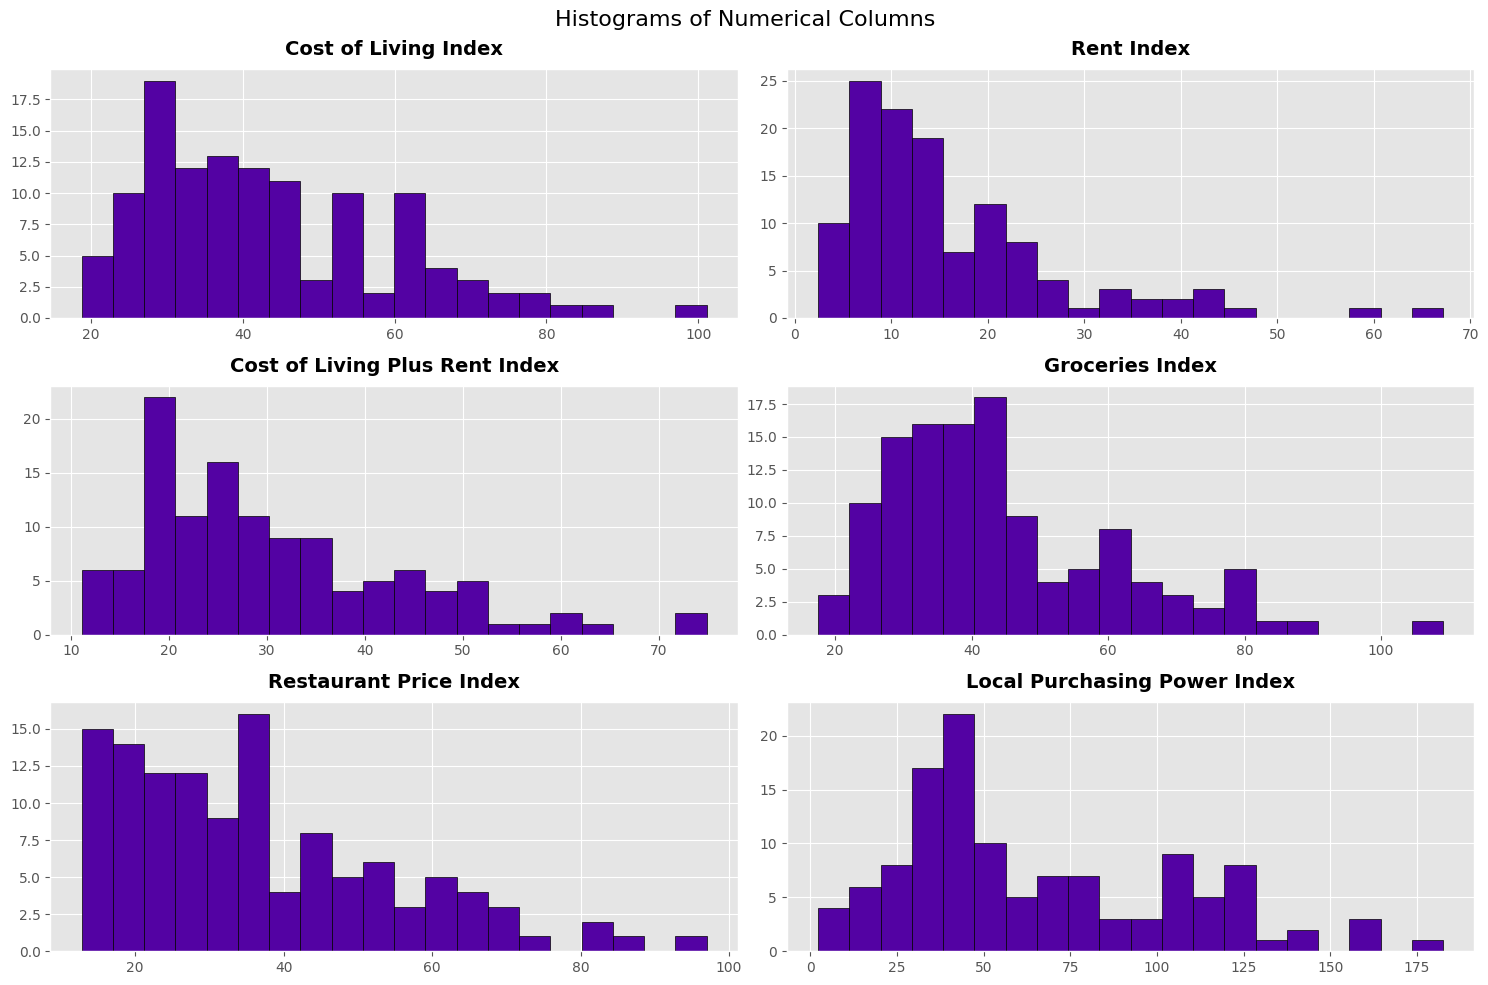

In [7]:
# Plot histograms for each numerical column
df.iloc[:, 2:].hist(figsize=(15, 10), bins=20,edgecolor='black')
plt.suptitle('Histograms of Numerical Columns', fontsize=16)
plt.show()

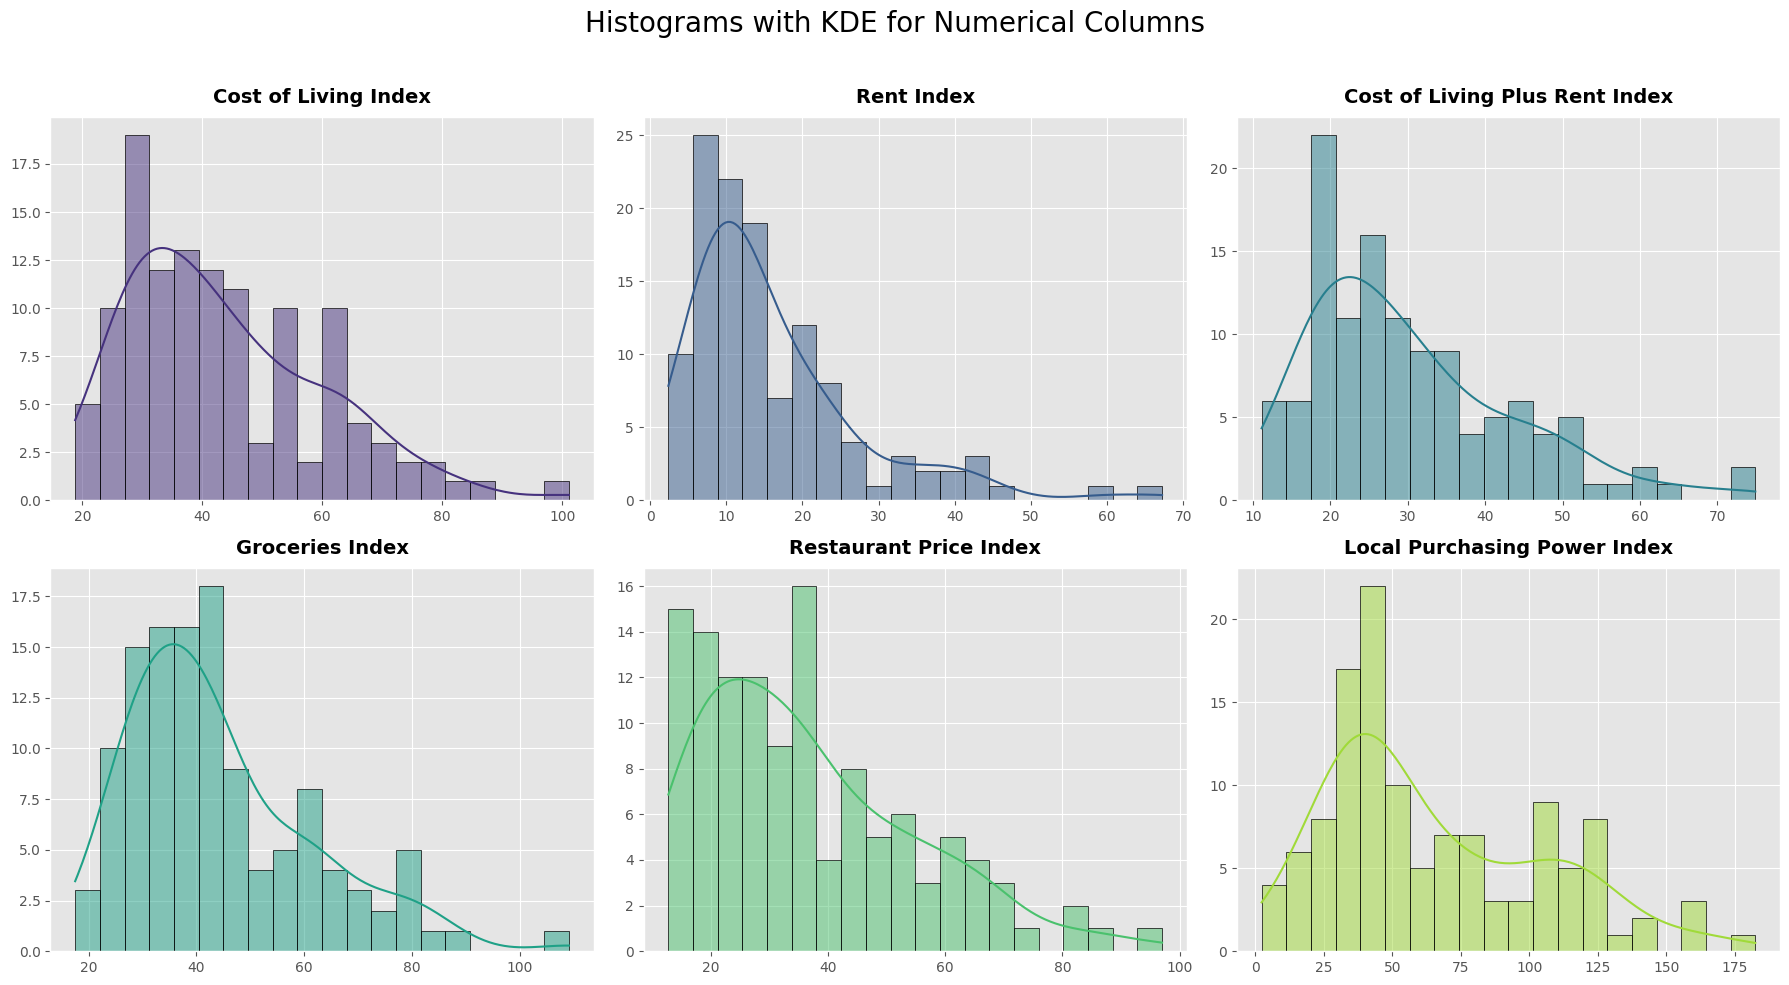

In [8]:
# Plot histograms for each numerical column using matplotlib subplots
# Set up the figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns to accommodate 6 columns
fig.suptitle('Histograms with KDE for Numerical Columns', fontsize=20)

# List of colors to use
colors = sns.color_palette('viridis', 6)

# Flatten the axes array to iterate easily
axes = axes.flatten()

# Iterate over the columns and axes to plot
for i, column in enumerate(df.columns[2:]):
    if i < len(axes):  # Ensure we don't exceed the number of subplots
        sns.histplot(df[column], kde=True, ax=axes[i], color=colors[i], edgecolor='black', bins=20)
        axes[i].set_title(f'{column}', fontsize=14)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

# Adjust layout for better spacing between plots
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust the rect parameter to prevent overlap with the suptitle
plt.show()

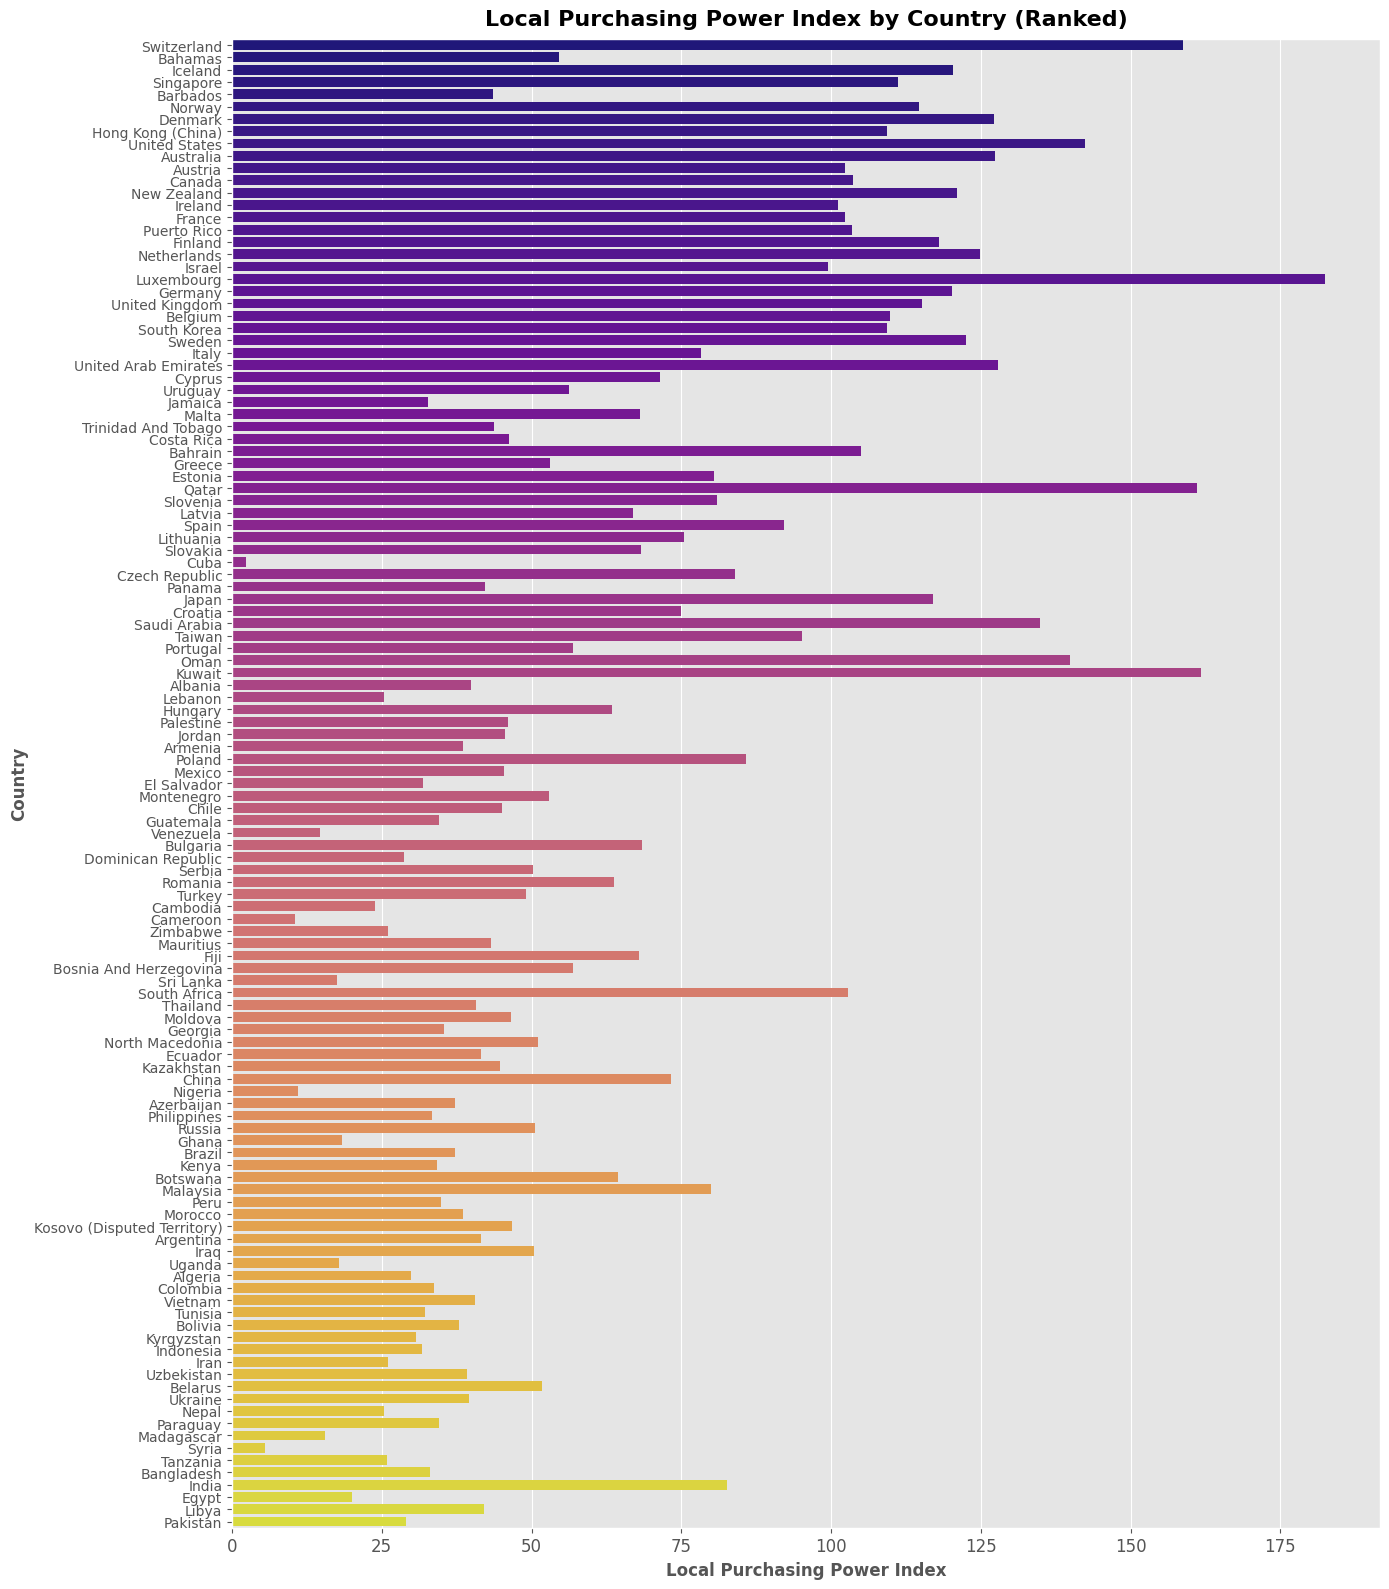

In [9]:
#Local Purchasing Power Index by Country
plt.figure(figsize=(14, 16))  
sns.barplot(x='Local Purchasing Power Index', y='Country', data=df.sort_values('Rank'), palette='plasma')
plt.title('Local Purchasing Power Index by Country (Ranked)', fontsize=16)
plt.xlabel('Local Purchasing Power Index')
plt.ylabel('Country')
plt.xticks(fontsize=12)  
plt.yticks(fontsize=10)  
plt.show()

In [10]:
# Cost of Living Index Rent Index by countries using plotly.graph_objects 
# Sort data by Cost of Living Index
df_sorted = df.sort_values('Cost of Living Index', ascending=False)

# Create the figure
fig = go.Figure()

# Add Cost of Living Index bars
fig.add_trace(go.Bar(
    y=df_sorted['Country'],
    x=df_sorted['Cost of Living Index'],
    name='Cost of Living Index',
    orientation='h',
    marker=dict(color='rgb(158,202,225)', line=dict(color='rgb(8,48,107)', width=1.5)),
    opacity=0.6
))

# Add Rent Index bars
fig.add_trace(go.Bar(
    y=df_sorted['Country'],
    x=df_sorted['Rent Index'],
    name='Rent Index',
    orientation='h',
    marker=dict(color='rgb(255,127,14)', line=dict(color='rgb(8,48,107)', width=1.5)),
    opacity=0.6
))

# Update layout
fig.update_layout(
    title='Cost of Living Index vs Rent Index by Country',
    xaxis_title='Index',
    yaxis_title='Country',
    yaxis=dict(showgrid=False, showline=False, showticklabels=True),
    barmode='overlay',  # You can switch to 'group' if you prefer side-by-side bars
    legend=dict(x=0.8, y=1.0),
    height=1200  # Increase height for readability
)

# Show the plot
fig.show()

Key Insight:

This graph compares the **Cost of Living Index** and **Rent Index** across countries, ranked by the Cost of Living Index. 

- **Switzerland** and **Iceland** are the most expensive overall, with both high living and rent costs.
- **Barbados** has a high cost of living but a moderate rent index, indicating expensive non-housing expenses.
- **Pakistan**, **Egypt**, and **Bangladesh** are among the most affordable, with low indices in both categories.
- Countries like the **United States** and **Germany** show higher rent costs relative to their overall living costs, suggesting rent significantly drives the expense in these regions.


In [11]:
# Choropleth map of Cost of Living Index
fig = px.choropleth(df, 
                    locations="Country", 
                    locationmode='country names',
                    color="Cost of Living Index", 
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.Plasma)

# Update layout with larger size
fig.update_layout(title_text='Global Cost of Living Index by Country', 
                  title_x=0.5,
                  width=1000,  # Adjust the width
                  height=800,  # Adjust the height
                  plot_bgcolor='rgba(128, 128, 128, 1)'
                 )  
fig.show()

In [12]:
# Create the scatter plot for Cost of Living Index vs Local Purchasing Power Index
fig = px.scatter(df, 
                 x='Cost of Living Index', 
                 y='Local Purchasing Power Index', 
                 text='Country',
                 color='Rent Index',  # Adding color based on Rent Index
                 size='Cost of Living Plus Rent Index',  # Size of points based on another index
                 hover_name='Country', 
                 title='Cost of Living Index vs Local Purchasing Power Index',
                 labels={'Cost of Living Index':'Cost of Living Index', 
                         'Local Purchasing Power Index':'Local Purchasing Power Index'})

# Customize the layout
fig.update_traces(textposition='top center')
fig.update_layout(height=800, 
                  title_x=0.5,
                  xaxis=dict(showgrid=True), 
                  yaxis=dict(showgrid=True),
                  template='plotly')

# Show the plot
fig.show()

Key Insight:

This scatter plot shows the relationship between the **Cost of Living Index** and the **Local Purchasing Power Index** across countries. 

- **Switzerland** and **Luxembourg** have high costs of living but also high purchasing power, indicating strong economies.
- **Bahamas** and **Barbados** have high costs of living with lower purchasing power, suggesting higher financial pressure on residents.
- Countries like **India** and **Syria** have low costs of living but also very low purchasing power, reflecting lower economic strength.
- **Rent Index** adds another layer of insight, with countries like **United States** and **Hong Kong** showing higher rent costs relative to their overall living conditions.


In [13]:
# Create the new variable: Adjusted Cost of Living Index (Excluding Rent)
'''
This ratio adjusts the Cost of Living Index by subtracting the Rent Index, providing a clearer view of the cost of living excluding the 
influence of rent. This is particularly useful for comparing countries where rent might disproportionately affect the overall cost of living
'''


df['Adjusted Cost of Living Index'] = df['Cost of Living Index'] - df['Rent Index']



fig = px.bar(df.sort_values('Adjusted Cost of Living Index', ascending=False),
             x='Country', 
             y='Adjusted Cost of Living Index', 
             color='Adjusted Cost of Living Index',
             title='Adjusted Cost of Living Index (Excluding Rent) by Country',
             labels={'Adjusted Cost of Living Index':'Adjusted Cost of Living Index'},
             color_continuous_scale=px.colors.sequential.Plasma)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Adjusted Cost of Living Index (Excluding Rent)',
    xaxis={'categoryorder':'total descending'},
    template='plotly',
    height=600
)

fig.show()

Key Insights:

1 - Barbados: When excluding rent, Barbados tops the list, indicating that its high cost of living is driven by factors other than housing. This could be due to the costs of importing goods, high demand for services, or other local economic factors.

2 - Bahamas, Iceland, and Norway: These countries also appear near the top, suggesting that they have significant living costs independent of rent. These are typically high-income countries or regions with limited local production, leading to higher prices for consumer goods.

3 - Nigeria,United Arab Emirates: At the bottom of the list, these countries have lower adjusted living costs when rent is excluded, indicating that the overall cost of living in these places might be more driven by rent or that non-housing expenses are generally lower.

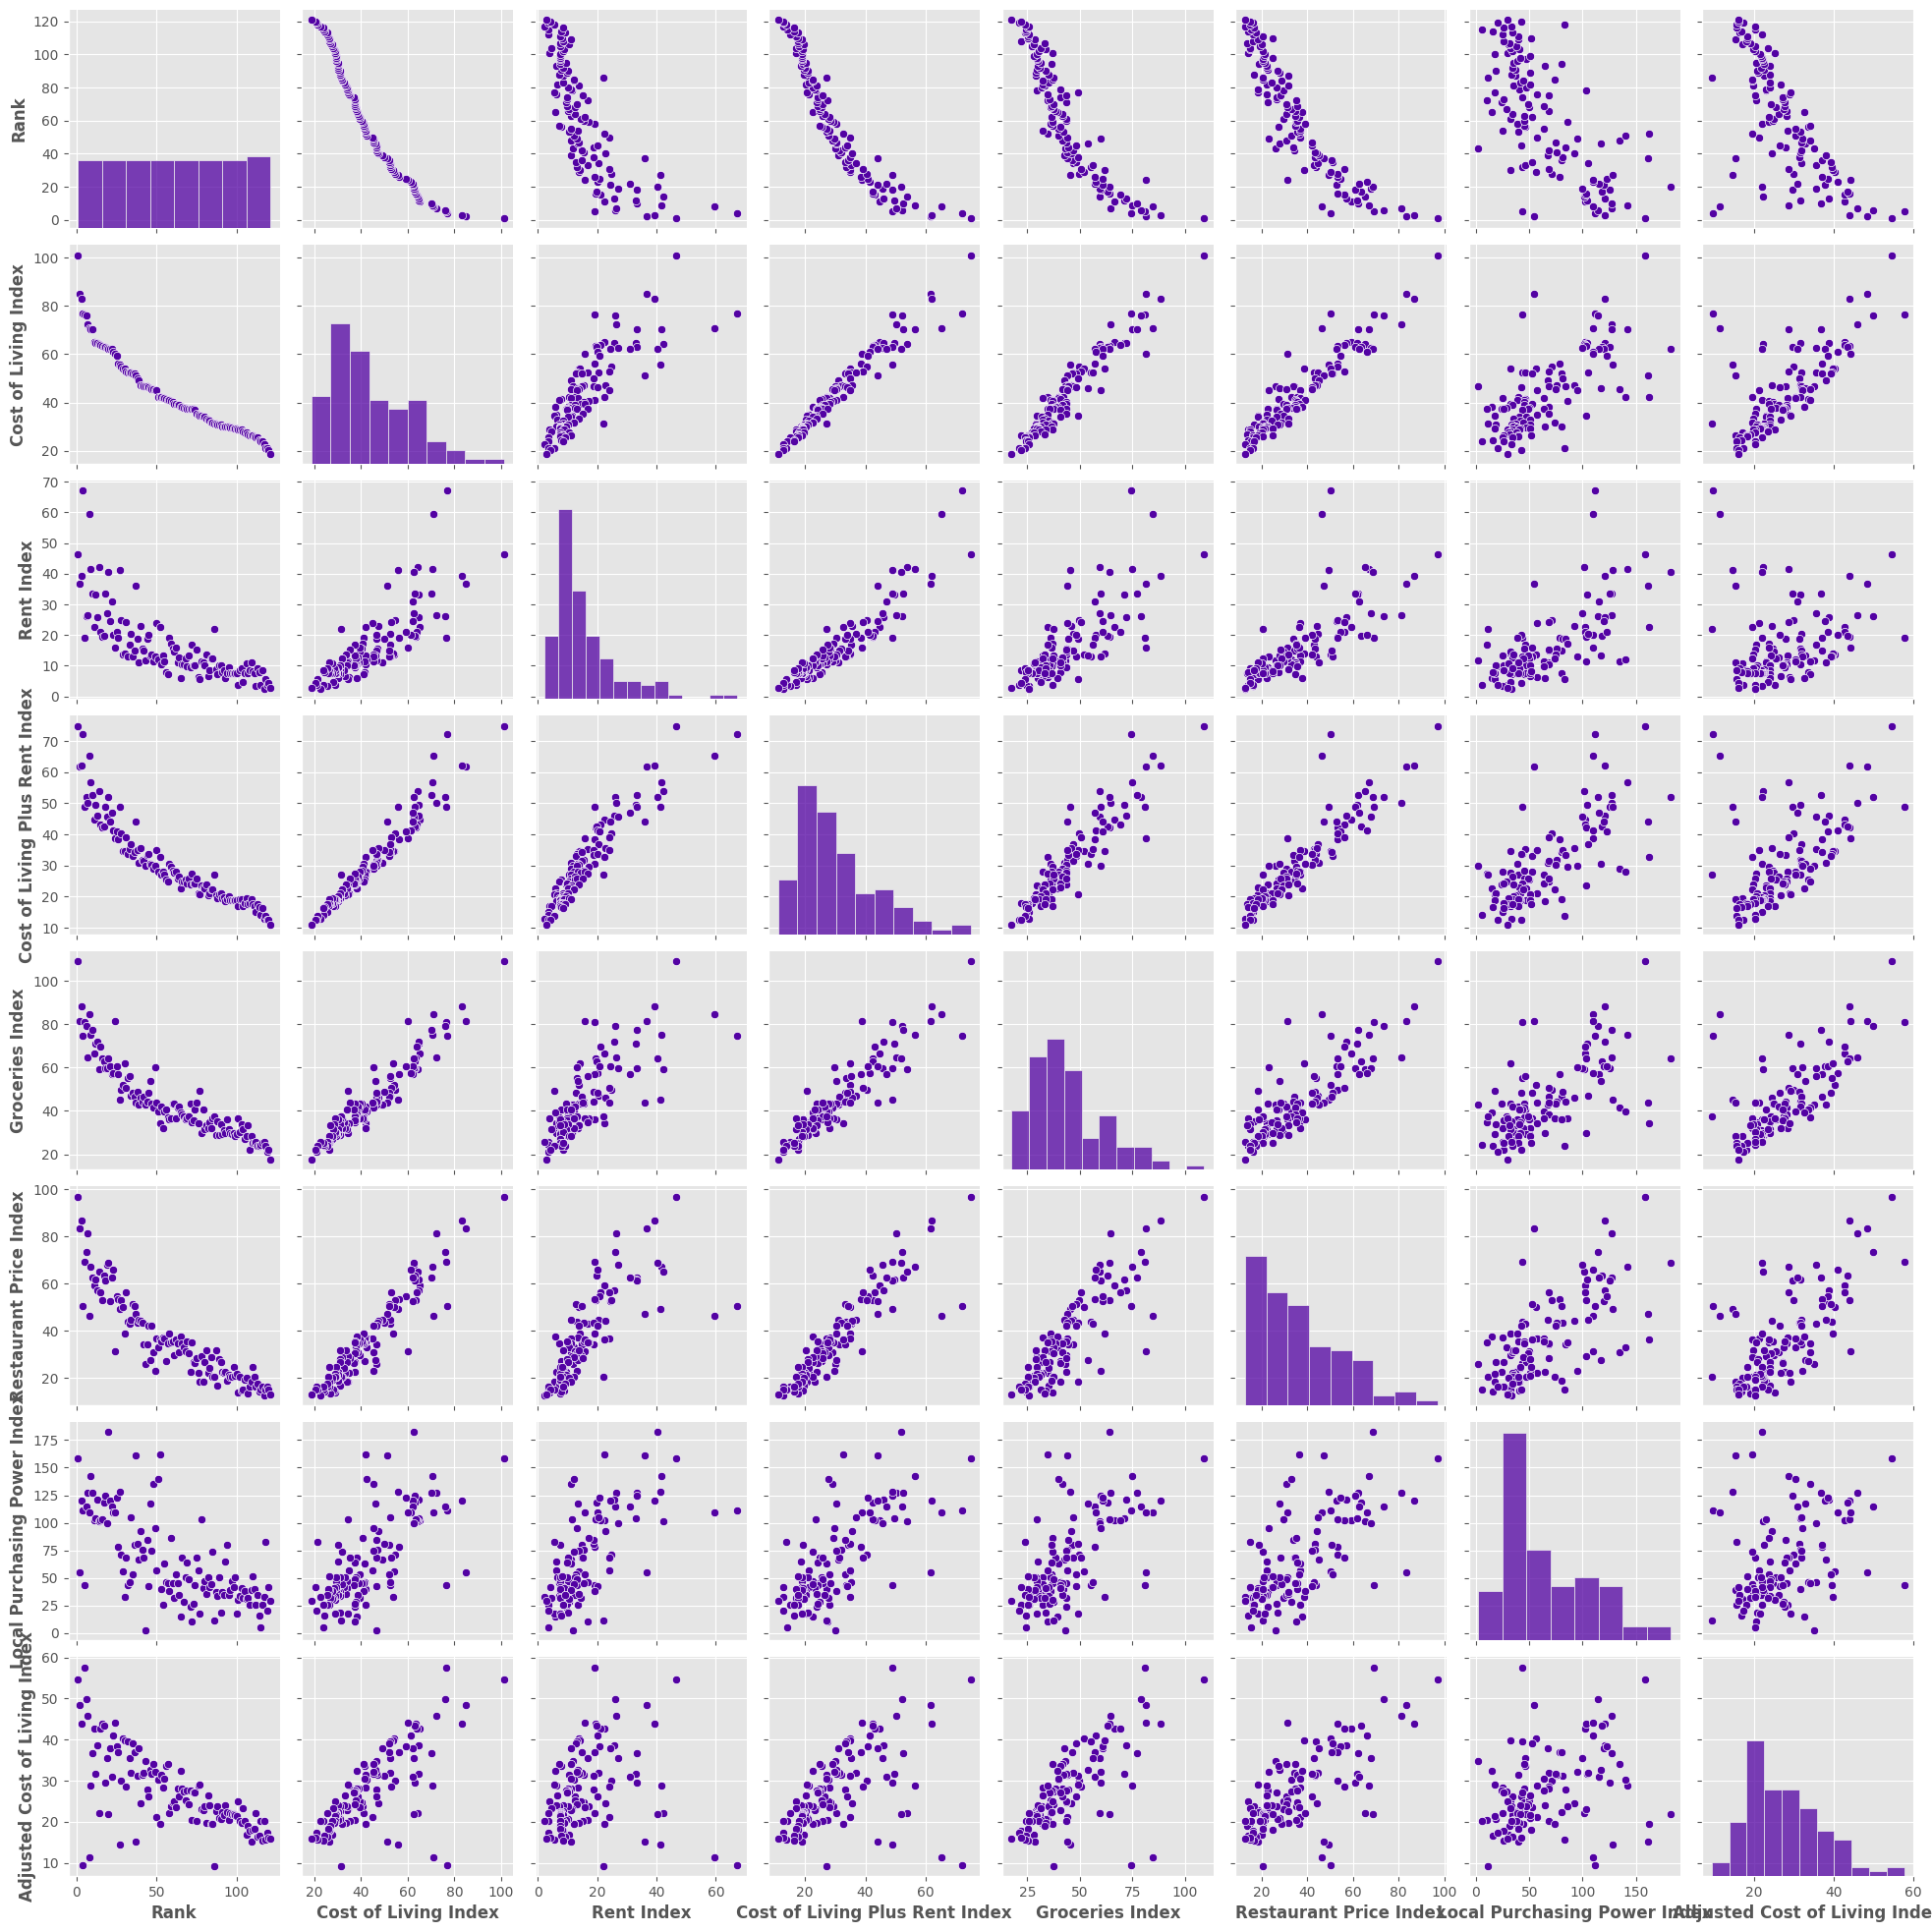

In [14]:
sns.pairplot(df);

 Key Insight:

The pair plot reveals the relationships and distributions among various indices. 

- Strong positive correlations are evident between the **Cost of Living Index**, **Rent Index**, and **Cost of Living Plus Rent Index**, indicating that these factors tend to increase together across countries.
- The **Local Purchasing Power Index** shows a more complex relationship, with a strong negative correlation to **Rank** and a non-linear pattern with other indices.
- The diagonal histograms highlight the distribution of each variable, showing varied distributions such as skewness in the **Rent Index** and more uniform distribution in the **Adjusted Cost of Living Index**.


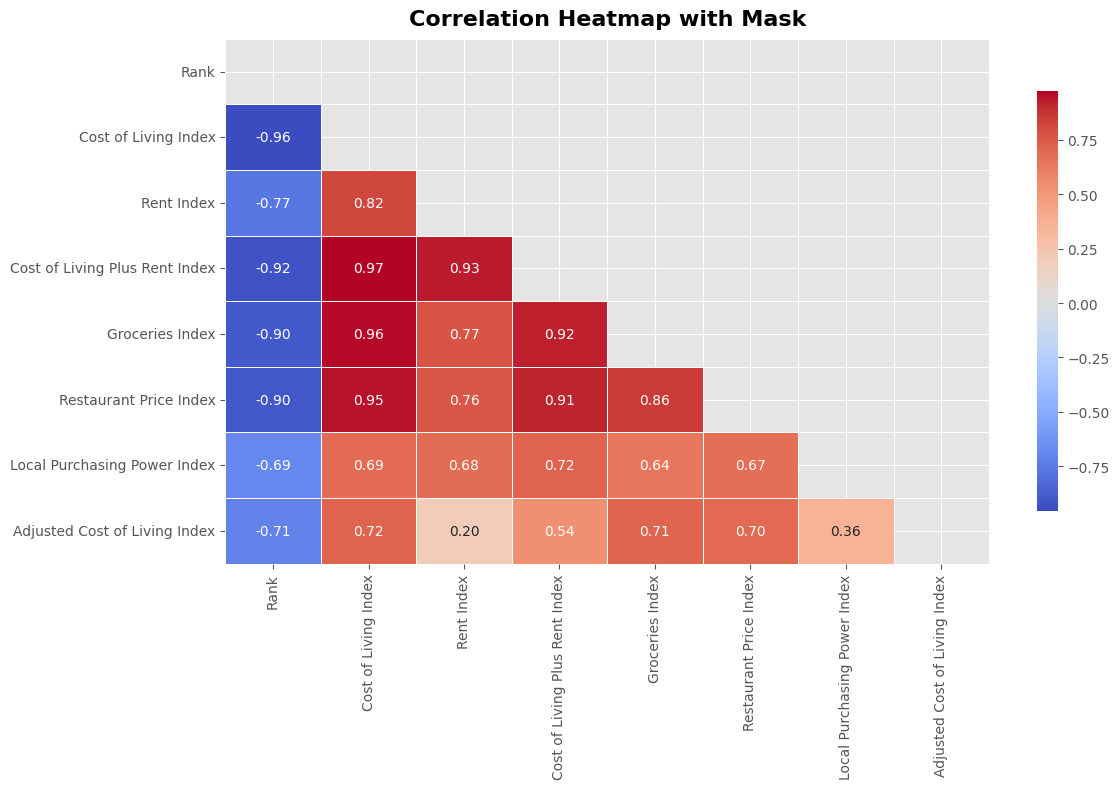

In [15]:
#corrolation between features 
# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap with Mask', fontsize=16)

plt.show()

Key Insights from the Correlation Heatmap:

- Strong Negative Correlation with Rank:
        The Cost of Living Index and Rank are strongly negatively correlated (-0.96). This indicates that countries with a higher cost of living tend to have a lower rank, meaning they are considered more expensive.
        Similarly, the Groceries Index and Rank also show a strong negative correlation (-0.90), suggesting that higher grocery costs are associated with a lower (more expensive) rank.

- High Positive Correlation Between Related Indices:
        The Cost of Living Index, Rent Index, and Cost of Living Plus Rent Index are highly positively correlated (0.97 and above). This is expected, as these indices are directly related to the overall cost of living.
        Groceries Index and Restaurant Price Index show a very high positive correlation (0.86), indicating that in countries where groceries are expensive, dining out is also costly.

-  Moderate Correlation with Local Purchasing Power Index:
        The Local Purchasing Power Index has a moderate positive correlation with the Cost of Living Index (0.69). This suggests that in countries where people have higher purchasing power, the cost of living tends to be higher as well.
        There is a moderate negative correlation between Local Purchasing Power Index and Rank (-0.69), indicating that higher purchasing power is associated with a higher (less expensive) rank.

- Adjusted Cost of Living Index:
        The Adjusted Cost of Living Index shows a strong correlation with the Cost of Living Index (0.72) and Groceries Index (0.70), but a lower correlation with the Rent Index (0.20). This confirms that this adjusted index effectively isolates non-rent related living costs.

**seeking for outliers sow we start with scatter plots to understand the relationships between key pairs of variables and spot any outliers in context**

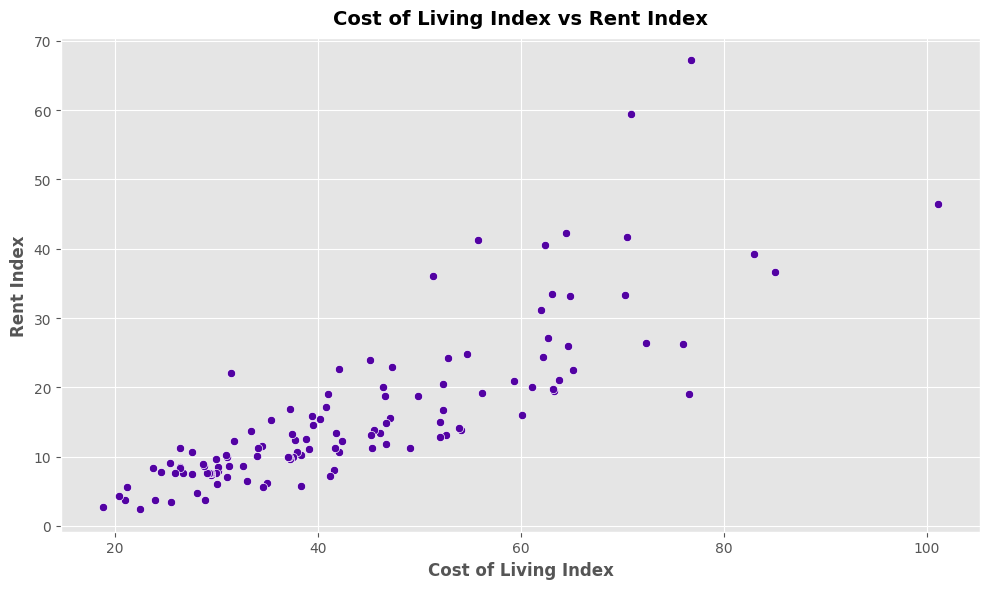

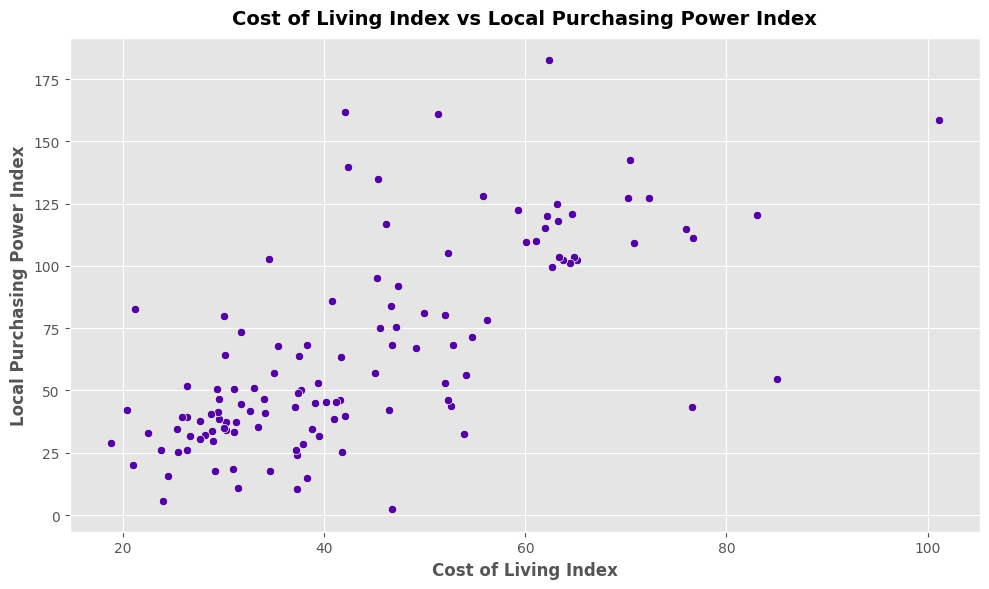

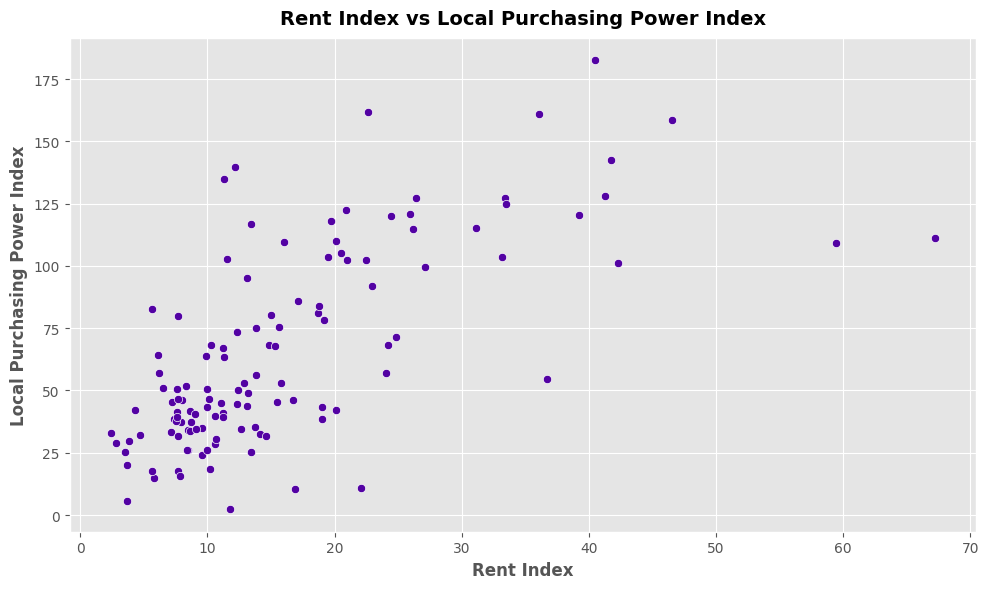

In [16]:
# Scatterplot between Cost of Living Index and Rent Index
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost of Living Index', y='Rent Index', data=df)
plt.title('Cost of Living Index vs Rent Index')
plt.xlabel('Cost of Living Index')
plt.ylabel('Rent Index')
plt.show()

# Scatterplot between Cost of Living Index and Local Purchasing Power Index
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cost of Living Index', y='Local Purchasing Power Index', data=df)
plt.title('Cost of Living Index vs Local Purchasing Power Index')
plt.xlabel('Cost of Living Index')
plt.ylabel('Local Purchasing Power Index')
plt.show()

# Scatterplot between Rent Index and Local Purchasing Power Index
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rent Index', y='Local Purchasing Power Index', data=df)
plt.title('Rent Index vs Local Purchasing Power Index')
plt.xlabel('Rent Index')
plt.ylabel('Local Purchasing Power Index')
plt.show()


1 - *Cost of Living Index vs Rent Index:*

    There's a positive correlation between the Cost of Living Index and the Rent Index, suggesting that countries with a higher cost of living also tend to have higher rent prices.
    However, there are a few points that deviate from the main trend, which might be outliers worth investigating further.

2- *Cost of Living Index vs Local Purchasing Power Index:*

    This scatterplot shows a more scattered relationship. While some countries with a high cost of living also have high purchasing power, there are countries where a high cost of living is associated with lower purchasing power, and vice versa.
    The outliers here are particularly interesting as they could indicate unique economic conditions in those countries.

3- *Rent Index vs Local Purchasing Power Index:*

    This plot also shows some correlation, but it’s less clear-cut. There are countries with high rent but varying levels of purchasing power, indicating that rent prices don't always correlate directly with how much people can afford.

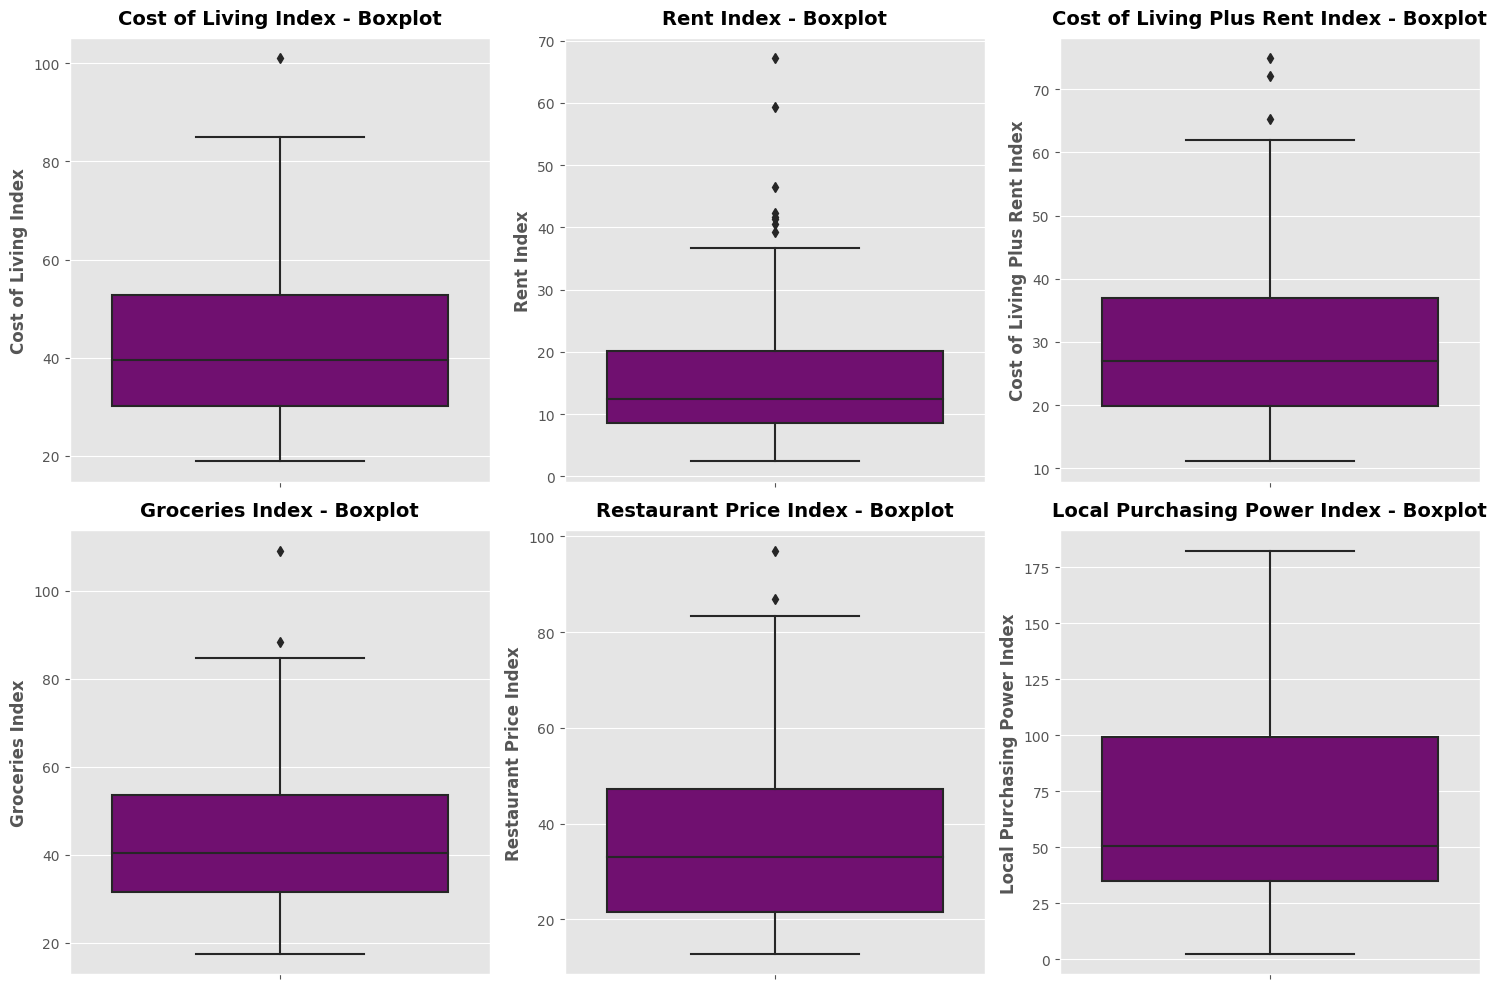

In [17]:
# Plot boxplots for each numerical column
# List of columns to check for outliers
columns_to_check = ['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
                    'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']

# Set up the figure for box plots
plt.figure(figsize=(15, 10))

# Create a box plot for each index
for i, column in enumerate(columns_to_check, 1):
    plt.subplot(2, 3, i)  # Arrange plots in 2 rows and 3 columns
    sns.boxplot(y=df[column], color='purple')
    plt.title(f'{column} - Boxplot')

plt.tight_layout()
plt.show()

In [18]:
# Identify and quantify outliers for each column
outliers = {}

for column in columns_to_check:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Display the number of outliers in each column
for column, data in outliers.items():
    print(f'{column} has {data.shape[0]} outliers')


Cost of Living Index has 1 outliers
Rent Index has 8 outliers
Cost of Living Plus Rent Index has 3 outliers
Groceries Index has 2 outliers
Restaurant Price Index has 2 outliers
Local Purchasing Power Index has 0 outliers


## **Statistical Testing**

In [19]:
# changing Rank to a Score
df['Rank_Score'] = 124 - df['Rank']  

#Normalization 

scaler = StandardScaler()
features_to_normalize = ['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
                         'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

### Linear Regressin test (OLS)

In [20]:
# Defining X(features) and Y(tareget)
X = df[features_to_normalize]
y = df['Rank_Score']

# adding interception (constant)
X = smi.add_constant(X)


model = smi.OLS(y, X).fit()

# printing the result
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Rank_Score   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     236.9
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           6.19e-62
Time:                        11:57:40   Log-Likelihood:                -444.31
No. Observations:                 121   AIC:                             902.6
Df Residuals:                     114   BIC:                             922.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Interpretation of OLS Regression Results

The OLS regression results show how the various explanatory variables (indices) influence the dependent variable `Rank_Score`. Here’s a detailed interpretation:

##### 1. Coefficient of Determination (R-squared and Adjusted R-squared)
- **R-squared**: 0.926
  - This means that 92.6% of the variance in `Rank_Score` is explained by the explanatory variables in the model. This indicates a very good fit, showing that the model effectively explains the variation in ranking.
- **Adjusted R-squared**: 0.922
  - Adjusting for the number of variables, 92.2% of the variance is still explained, suggesting that adding these variables is relevant for explaining `Rank_Score`.

##### 2. F-statistic and Prob (F-statistic)
- **F-statistic**: 236.9
  - This value indicates that the overall model is statistically significant.
- **Prob (F-statistic)**: 6.19e-62
  - An extremely low p-value (close to zero) suggests that the model is significant and that at least one of the explanatory variables is useful in predicting `Rank_Score`.

##### 3. Coefficients and Statistical Significance (P>|t|)
- **Constant (Intercept)**: 63.0000
  - This represents the average score when all explanatory variables are zero.
  
- **Cost of Living Index**: -381.3379, p = 0.071
  - A negative effect, but marginally non-significant (p=0.071). This suggests that countries with a high cost of living index tend to have a lower rank, but this relationship is not strong enough to be statistically significant.
  
- **Rent Index**: -288.0027, p = 0.038
  - A significant negative relationship (p<0.05), indicating that countries with higher rent tend to have a lower rank.

- **Cost of Living Plus Rent Index**: 688.4469, p = 0.040
  - A significant positive effect (p<0.05), suggesting that this combined index has a strong influence on the rank. The higher this index, the higher the country’s rank score.

- **Groceries Index**: -13.1308, p = 0.001
  - A significant negative relationship (p<0.01), indicating that countries with a high groceries index tend to have a lower rank.

- **Restaurant Price Index**: -7.3210, p = 0.030
  - A significant negative effect (p<0.05), suggesting that higher restaurant prices are associated with a lower rank.

- **Local Purchasing Power Index**: 2.3358, p = 0.074
  - A positive but non-significant effect (p=0.074), indicating that higher local purchasing power might be associated with a higher rank, but this relationship is not strong enough to be significant.

##### 4. Diagnostic Tests for Normality and Multicollinearity
- **Omnibus**: 72.260, **Prob(Omnibus)**: 0.000
  - Indicates that the residuals do not follow a normal distribution. This result is supported by the **Skew** and **Kurtosis** values, which suggest deviations from normality.

- **Durbin-Watson**: 0.407
  - This low value indicates a strong positive autocorrelation of the residuals, which could signal a problem of time dependency or correlated series.

- **Condition Number**: 1.06e+03
  - A high condition number (> 1000) suggests potential multicollinearity, meaning some explanatory variables may be highly correlated with each other, which can affect the coefficient estimates.

##### 5. Conclusion
- **Overall Model**: The model explains a significant portion of the variance in ranking with a high R-squared, but the diagnostic tests indicate potential issues, including non-normality of residuals, autocorrelation, and multicollinearity.
- **Impact of Variables**: The `Cost of Living Plus Rent Index` has the strongest positive impact on rank, while other indices like `Rent Index` and `Groceries Index` have significant negative impacts. The effects of `Cost of Living Index` and `Local Purchasing Power Index` are less significant.
- **Improvements**: To improve the model, it could be beneficial to explore variable transformations, examine multicollinearity more closely, or consider non-linear models.

This model provides a good initial understanding, but further adjustments and checks are necessary to address the diagnostic issues.

### examining multicollinearity

In [21]:
X = df[features_to_normalize]
X = smi.add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                          feature            VIF
0                           const       1.000000
1            Cost of Living Index   55213.215940
2                      Rent Index   23691.045961
3  Cost of Living Plus Rent Index  138765.541151
4                 Groceries Index      18.415329
5          Restaurant Price Index      13.989984
6    Local Purchasing Power Index       2.113031


#### PCA

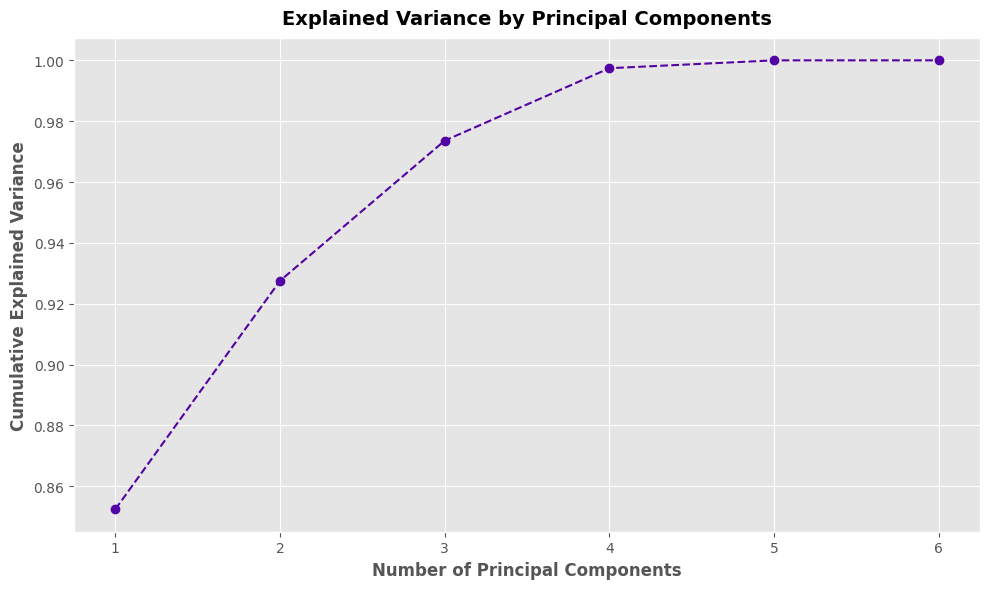

In [22]:
# Select the features to apply PCA on
features_to_reduce = ['Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index',
                      'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index']

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(df[features_to_reduce])

# Plot the explained variance to decide how many components to keep
explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [23]:
n_components = 4

pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(df[features_to_reduce])

# Create a DataFrame for the reduced components
pca_columns = [f'PC{i+1}' for i in range(n_components)]
df_pca = pd.DataFrame(X_reduced, columns=pca_columns)

# Add the Rank or Rank_Score to this new DataFrame for further analysis
df_pca['Rank_Score'] = df['Rank_Score']


In [24]:
# Define X and y
X = df_pca.drop(columns=['Rank_Score'])
y = df_pca['Rank_Score']

# Add a constant for the intercept
X = smi.add_constant(X)

# Fit the OLS model with PCA components
model_pca = smi.OLS(y, X).fit()

# Display the summary
print(model_pca.summary())

                            OLS Regression Results                            
Dep. Variable:             Rank_Score   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     253.2
Date:                Fri, 06 Sep 2024   Prob (F-statistic):           2.58e-56
Time:                        11:57:41   Log-Likelihood:                -463.98
No. Observations:                 121   AIC:                             938.0
Df Residuals:                     116   BIC:                             951.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.0000      1.040     60.600      0.0

In [25]:
X = smi.add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  feature  VIF
0   const  1.0
1     PC1  1.0
2     PC2  1.0
3     PC3  1.0
4     PC4  1.0


## Maching Learning (Clustering)

In [26]:
# Apply K-means clustering on the PCA-reduced data
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X)

# Add the cluster labels to the PCA DataFrame
df_pca['Cluster'] = clusters


#### **Analyze and visualize the clusters**

In [27]:
# adding clusters Label  to the original DataFrame 
df['Cluster'] = df_pca['Cluster']

# mean of each  cluster
cluster_means = df.groupby('Cluster')[features_to_reduce].mean()
cluster_means.describe()

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,0.767598,0.819316,0.824005,0.766627,0.684071,0.542485
std,1.333835,1.513858,1.461129,1.355322,1.180800,0.951384
min,-0.749679,-0.629658,-0.734653,-0.694399,-0.723596,-0.687458
25%,-0.030525,-0.128760,-0.071922,-0.079011,-0.024292,0.030732
50%,0.740581,0.528161,0.686974,0.664017,0.757973,0.781625
75%,1.538703,1.476238,1.582901,1.509655,1.466336,1.293379
max,2.338908,2.850601,2.656725,2.432871,1.943934,1.294149


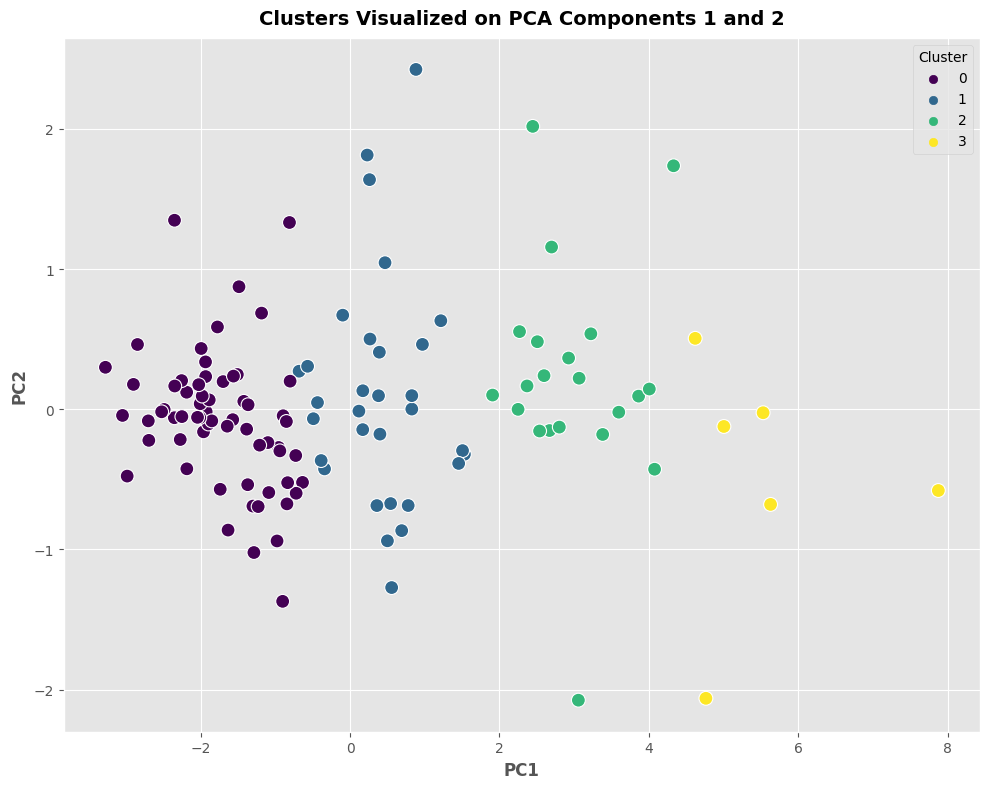

In [28]:
# Visualiserzation  of clustersin the 2 first clusters 
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca, palette='viridis', s=100)
plt.title('Clusters Visualized on PCA Components 1 and 2')
plt.show()

In [29]:
#  3D Visualization 
fig = px.scatter_3d(df_pca, 
                    x='PC1', 
                    y='PC2', 
                    z='PC3', 
                    color='Cluster', 
                    hover_name=df['Country'],  
                    title='3D Visualization of Clusters on PCA Components',
                    labels={'PC1': 'Principal Component 1', 
                            'PC2': 'Principal Component 2', 
                            'PC3': 'Principal Component 3'},
                    width=1000, 
                    height=800) 


fig.update_traces(marker=dict(size=7))


fig.show()

*Nice Clustering :)*


**IF LIKE THE WORK PLEASE LEAVE A COMMENT AND UPVOTE**

### **thanks** 